In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
df = pd.DataFrame({'client_id' : [np.nan, 3998,np.nan,np.nan,5746], 'sex': [np.nan,1,np.nan,np.nan,0], 'wealth': [np.nan,'high',np.nan,np.nan,'high'], 'age': ['58','55','46','23','44']})

In [35]:
df

,client_id,sex,wealth,age
0,NaN,NaN,NaN,58
1,3998.0,1.0,high,55
2,NaN,NaN,NaN,46
3,NaN,NaN,NaN,23
4,5746.0,0.0,high,44


In [36]:
df.isna().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

In [37]:
df.dtypes

client_id    float64
sex          float64
wealth        object
age           object
dtype: object

In [38]:
df['age'] = df['age'].astype(int)

In [39]:
df = df.drop(['age', 'sex'], axis=1)

In [40]:
df

,client_id,wealth
0,NaN,NaN
1,3998.0,high
2,NaN,NaN
3,NaN,NaN
4,5746.0,high


In [41]:
numbers = [1, -2, 3, 0, -3, 2]

In [146]:
taxi = pd.read_csv("~/lesson_3/3_taxi_peru.csv", sep=';')

In [94]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [150]:
taxi["start_at"] = pd.to_datetime(taxi["start_at"])
taxi["end_at"] = pd.to_datetime(taxi["end_at"])
taxi["arrived_at"] = pd.to_datetime(taxi["arrived_at"])

In [97]:
taxi.shape

(23111, 19)

In [98]:
taxi = taxi.loc[(taxi["start_type"] == "asap") | (taxi["start_type"] == "reserved")]

In [99]:
taxi.shape

(23091, 19)

In [149]:
taxi["wait_time"] = ((taxi["arrived_at"] - taxi["start_at"])).astype('timedelta64[m]')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [105]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [117]:
reserved_orders = taxi[(taxi["start_type"] == "reserved") & (taxi["wait_time"] > 0.0)]

In [126]:
reserved_orders.groupby('driver_id', as_index=False)['wait_time'].count().sort_values('wait_time', ascending=False)

,driver_id,wait_time
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


In [128]:
reserved_orders('driver_id' == '406921adcca37705ef527b4246c0cfea')

TypeError: 'DataFrame' object is not callable

In [130]:
driver_stats = reserved_orders[reserved_orders['driver_id'] == '406921adcca37705ef527b4246c0cfea']

In [131]:
driver_stats

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
197,275052e660ff5672db6624c42b6b4f59,29a360323f1754d8cf08023eb1f3dbb7,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-05-02 18:30:00,"-12,08666992","-76,9319458",2010-05-02 19:19:00,"-12,10585403","-77,03704834",drop off,"-12,12186052","-77,02913578",2010-05-02 18:33:00,iPhone,5.0,5.0,3.0
434,c32c353f4a9bc8ae2e079e6bb7cb9366,0280ac72b104d8a55d2d23d5321b665f,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-11-21 17:45:00,"-12,13144684","-77,02966309",2010-11-21 18:04:00,"-12,08789444","-77,01257324",drop off,"-12,12120876","-77,03697602",2010-11-21 17:48:00,iPhone,NaN,5.0,3.0
1055,bb3af86cd1cc8948a514796d363f9dce,0a98cead98f3935ef3051e834a30419e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-03 22:00:00,"-12,783333","-76,566667",2010-03-04 00:35:00,"-12,1005158","-76,9931074",drop off,"-12,3908164","-76,76675939",2010-03-03 22:06:00,web,NaN,NaN,6.0
1067,6f2fdf6e4148cb011614ac61629d2c6d,8e37a68fab5f31a5e2c1b5f77c6bb9e5,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-12 01:50:00,"-12,023261","-77,098282",2010-03-12 03:33:00,"-12,091879","-77,024572",drop off,"-12,07427538","-77,0851266",2010-03-12 02:48:00,web,NaN,NaN,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,1881c928349fa432c4c0cb4434802c81,16cbe35db7fff70fbc8251b4cdc843b1,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-10-23 15:00:00,"-12,0828829","-76,9315111",2010-10-23 16:13:00,"-12,0600981","-77,1370233",drop off,"-12,09773921","-77,01999544",2010-10-23 15:03:00,web,5.0,5.0,3.0
21661,2254715f0f569e3173ec61f16cdcc1e6,86aa09456b63a2a25e0097c5520497ec,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-08-09 15:00:00,"-12,0167023","-76,8515593",2010-08-09 15:42:00,"-12,0959378","-77,0375891",drop off,"-12,04726631","-76,94286792",2010-08-09 15:06:00,web,NaN,5.0,6.0
21890,2f1882c87731970df63e69d4bc2515da,68fe4d0ad82cc2d715d131953336d717,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-07-10 20:45:00,"-12,0868345","-77,0100778",2010-07-10 21:40:00,"-12,1198424","-77,0302427",drop off,"-12,08746273","-77,00995593",2010-07-10 21:17:00,web,NaN,5.0,32.0
22378,5111ac6114962976d7fd625788b072ca,0a98cead98f3935ef3051e834a30419e,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,reserved,2010-10-06 17:00:00,"-12,1005158","-76,9931074",2010-10-06 19:29:00,"-12,0948156","-76,7567368",drop off,"-12,11746653","-76,98470932",2010-10-06 17:01:00,web,NaN,NaN,1.0


In [133]:
driver_stats.groupby('driver_score').head(20)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
197,275052e660ff5672db6624c42b6b4f59,29a360323f1754d8cf08023eb1f3dbb7,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-05-02 18:30:00,"-12,08666992","-76,9319458",2010-05-02 19:19:00,"-12,10585403","-77,03704834",drop off,"-12,12186052","-77,02913578",2010-05-02 18:33:00,iPhone,5.0,5.0,3.0
434,c32c353f4a9bc8ae2e079e6bb7cb9366,0280ac72b104d8a55d2d23d5321b665f,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-11-21 17:45:00,"-12,13144684","-77,02966309",2010-11-21 18:04:00,"-12,08789444","-77,01257324",drop off,"-12,12120876","-77,03697602",2010-11-21 17:48:00,iPhone,NaN,5.0,3.0
1055,bb3af86cd1cc8948a514796d363f9dce,0a98cead98f3935ef3051e834a30419e,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-03 22:00:00,"-12,783333","-76,566667",2010-03-04 00:35:00,"-12,1005158","-76,9931074",drop off,"-12,3908164","-76,76675939",2010-03-03 22:06:00,web,NaN,NaN,6.0
1067,6f2fdf6e4148cb011614ac61629d2c6d,8e37a68fab5f31a5e2c1b5f77c6bb9e5,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-12 01:50:00,"-12,023261","-77,098282",2010-03-12 03:33:00,"-12,091879","-77,024572",drop off,"-12,07427538","-77,0851266",2010-03-12 02:48:00,web,NaN,NaN,58.0
1091,c1e6662a9702c8ef6c1fec12fff9d2dd,dc874dfe725f73eaed3fd0ec71b9f4ef,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-03-22 12:30:00,"-12,16762161","-77,03137207",2010-03-22 13:07:00,"-12,10667038","-77,03878784",drop off,"-12,15862416","-76,97247713",2010-03-22 12:31:00,iPhone,NaN,5.0,1.0
1145,88b25017b7197266d1e617b86ea056ce,4c37542f88f6bc6fb2465a93be20ac81,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-04-16 15:30:00,"-12,1171111","-77,0389639",2010-04-16 15:52:00,"-12,1054616","-77,0440214",drop off,"-12,1170734","-77,03120516",2010-04-16 15:43:00,web,NaN,NaN,13.0
1146,4c37542f88f6bc6fb2465a93be1f568d,b8ae7685c97ef64f90a646a3b97e4233,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-04-17 01:10:00,"-12,0489358","-77,0290531",2010-04-17 02:16:00,"-12,1163192","-77,0197284",drop off,"-12,04805087","-77,02986344",2010-04-17 02:12:00,web,NaN,NaN,62.0
1149,481f1add0f693b6e78ca04cb735bd94f,fd3831b43f038c9ee0e840c18ba7f764,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-04-18 11:15:00,"-12,1416667","-77,0166667",2010-04-18 11:57:00,"-12,019468","-77,107768",drop off,"-12,15402952","-76,9658067",2010-04-18 11:16:00,web,NaN,5.0,1.0
1153,dc72eb5bdd1b0050aaeca0c6f78085cf,68fe4d0ad82cc2d715d131953312673c,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-04-18 15:00:00,"-12,12025833","-77,03015137",2010-04-18 15:22:00,"-12,09435272","-77,02890015",drop off,"-12,11603184","-77,02257027",2010-04-18 15:02:00,iPhone,5.0,5.0,2.0


In [151]:
taxi['month'] = taxi['start_at'].dt.month

In [152]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [159]:
taxi.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score', 'month', 'weekday'],
      dtype='object')>

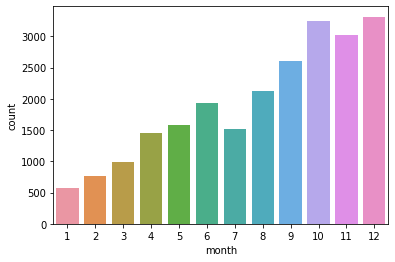

In [153]:
ax = sns.countplot(x=taxi["month"])

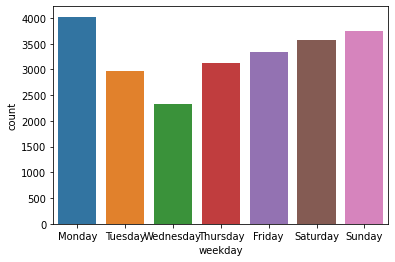

In [157]:
ax = sns.countplot(x=taxi["weekday"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [163]:
MAU = taxi.groupby('month')['user_id'].nunique()

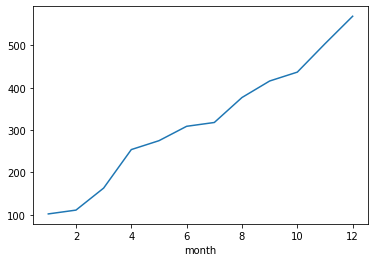

In [166]:
MAU.plot.line()